 INTERN PE: TASK-1 DIABETIC PREDICTION
CHECKING WHETHER THE PATIENTS IS DIABETIC OR NOT

IMPORT THE LIBRARIES

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

DATA EXPLORATION AND ANALYSIS

LOAD THE DATASETS

In [4]:
df = pd.read_csv("diabetes.csv")

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
df.shape

(768, 9)

In [7]:
# TO GET THE STATISTICAL MEASURES OF THIS DATASET
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [8]:
# to find out the total null values present in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


CHECKING NULL VALUES

In [9]:
# verifying is there any null values are present in the dataset
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

CHECKING DUPLICATED VALUES

In [10]:
df.duplicated().sum()

0

In [11]:
df["Outcome"].value_counts()

# 0 = non diabetic patient
# 1= diabetic patient


Outcome
0    500
1    268
Name: count, dtype: int64

In [12]:
df.groupby("Outcome").mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [13]:
# from this dataset we can come into certain prediction that is older people are more susceptible to diabetes
# the more glucose level can leads to cause the diabetes and also have the high blood pressure

In [14]:
X=df.drop(columns="Outcome", axis=1)
Y=df["Outcome"]

In [15]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [16]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


DATA VISUALIZATION

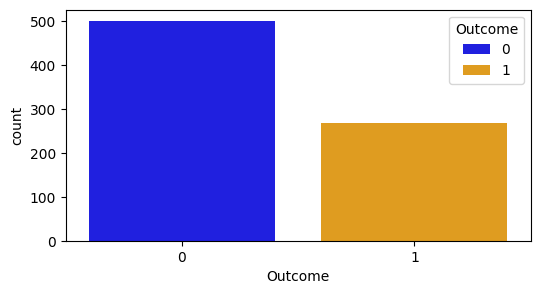

In [20]:
plt.figure(figsize= (6,3))
sns.countplot(x= "Outcome",data=df, hue="Outcome", palette=["blue","orange"])
plt.show()

OBSERVING OUTLIERS

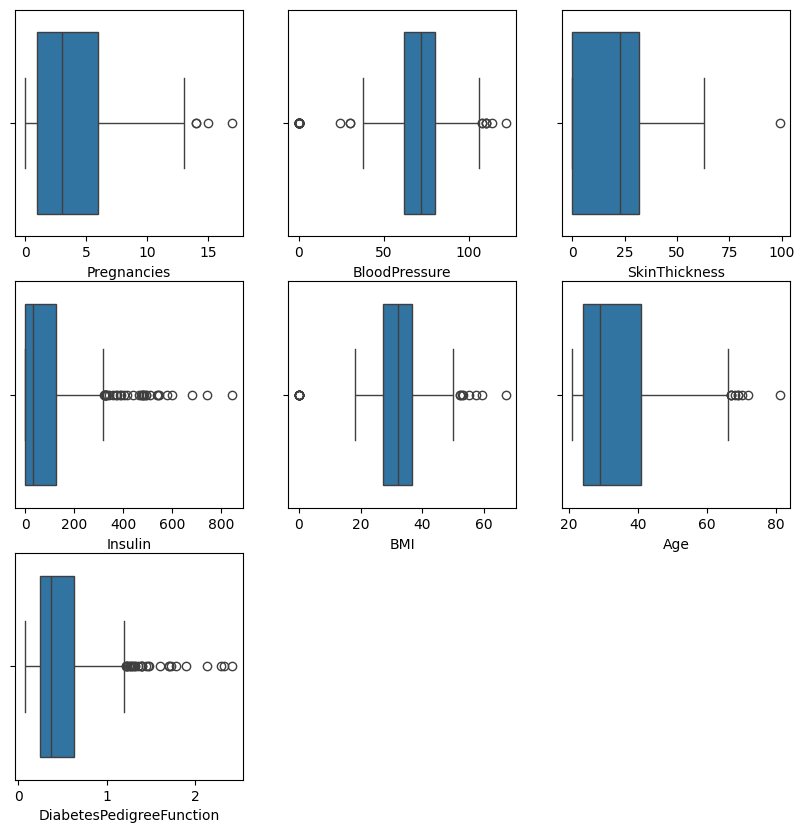

In [22]:
plt.figure(figsize = (10,10))
for i,col in enumerate(["Pregnancies","BloodPressure","SkinThickness","Insulin","BMI","Age","DiabetesPedigreeFunction"]):
    plt.subplot(3,3, i+1)
    sns.boxplot(x=col, data=df)
plt.show()

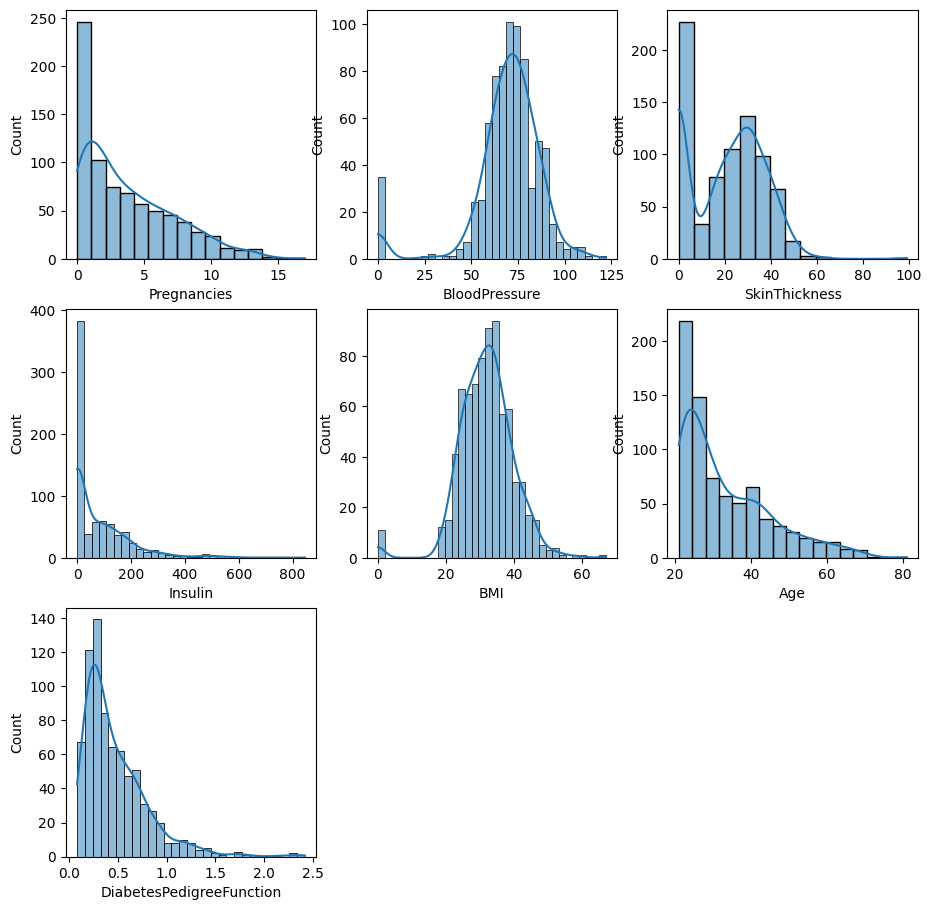

In [23]:
plt.figure(figsize = (11,11))
for i,col in enumerate(["Pregnancies","BloodPressure","SkinThickness","Insulin","BMI","Age","DiabetesPedigreeFunction"]):
    plt.subplot(3,3, i+1)
    sns.histplot(x=col, data=df, kde=True)
plt.show()

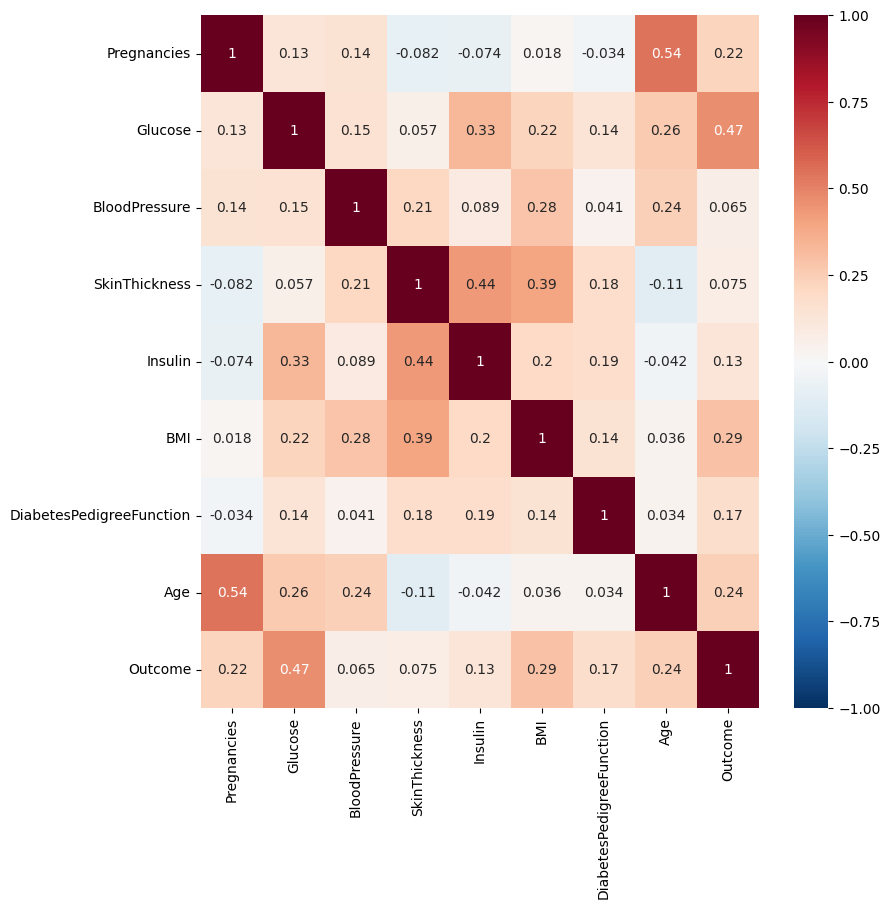

In [28]:
plt.figure(figsize = (9,9))

sns.heatmap(data=df.corr(), vmin= -1, vmax=1, center=0, cmap="RdBu_r", annot=True)

plt.show()

DATA STANDARDIZATION

In [30]:
scaler=StandardScaler()

In [33]:
scaler.fit(X)

StandardScaler()

In [34]:
standardized_data=scaler.transform(X)

In [41]:
print(standardized_data)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [42]:
# different ranges of datas are make the model difficult to predict 
# data standardization is process of transforming the inconsistent data into the consistant datas which is datas are in same range
# here datas are in the range between 0 to 1
# standardizing the datas makes the model easy to predict

In [35]:
X=standardized_data
Y=df["Outcome"]

In [44]:
print(X)
print(Y)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


TRAIN TEST SPLIT 

In [41]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, test_size=0.2,random_state=2)
print(X.shape)
print(X_train.shape)
print(X_train)
print(X_test.shape)
print(X_test)


(768, 8)
(614, 8)
[[-0.84488505  0.09719231  0.25303625 ... -0.53211885 -1.12311057
  -0.27575966]
 [-0.84488505 -0.81042491  0.66661825 ...  0.38169971 -0.72143478
   0.83038113]
 [-1.14185152 -0.84172205  0.04624525 ...  1.4605133  -0.37714125
  -1.04154944]
 ...
 [ 0.04601433  0.12848945  0.04624525 ... -0.39250768  2.02989333
   1.00055664]
 [-0.25095213 -0.15318486  0.25303625 ... -0.72249772 -1.10196973
  -0.78628618]
 [ 0.04601433 -0.34096773 -0.16054575 ... -0.01174995 -0.00264654
  -0.36084741]]
(154, 8)
[[-0.54791859 -1.02950492  0.25303625 ... -0.37981576 -0.73351526
  -0.95646168]
 [-0.54791859  0.25367803  0.77001375 ... -0.506735   -0.56740873
  -0.53102292]
 [-1.14185152 -0.59134489  0.45982725 ...  0.31824009 -0.70633419
  -0.78628618]
 ...
 [-1.14185152  0.34756947  0.45982725 ...  0.05170968 -0.23821579
  -1.04154944]
 [ 0.3429808   0.5040552   2.01075975 ...  2.1331853  -0.73955549
   0.31985461]
 [-0.84488505 -1.4989621  -0.98770975 ... -1.14133123 -0.676133
  -1.04

TRAINING THE MODEL

In [44]:
# model selection-support vector machine 
# training the support vector classifier
classifier=svm.SVC(kernel='linear')
classifier.fit(X_train,Y_train)

SVC(kernel='linear')

MODEL EVALUATION

ACCURACY SCORE

In [55]:
# evaluating the model based on training data and test data
# accuracy score on training data and test data

X_train_prediction=classifier.predict(X_train) 
training_data_accuracy=accuracy_score(X_train_prediction,Y_train) 
print('Accuracy score of the training data :', training_data_accuracy)

X_test_prediction=classifier.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction,Y_test)
print('Accuracy score of the test data :', test_data_accuracy)

Accuracy score of the training data : 0.7719869706840391
Accuracy score of the test data : 0.7662337662337663


BUILDING PREDICTIVE SYSTEM

In [50]:
input_data=(6,148,72,35,0,33.6,0.627,50)

# changing the input data into numpy array
input_data_as_numpy_array=np.asarray(input_data)

#reshaping the input data for predicting one instance
input_data_reshaped= input_data_as_numpy_array.reshape(1,-1)

#standardize the input data
std_data =scaler.transform(input_data_reshaped)
print("standardized data:", std_data)

prediction=classifier.predict(std_data)
print(prediction)

if (prediction[0]==0):
    print("the patient is not diabetic")
else:
    print("the patient is diabetic")

standardized data: [[ 0.63994726  0.84832379  0.14964075  0.90726993 -0.69289057  0.20401277
   0.46849198  1.4259954 ]]
[1]
the patient is diabetic


C:\Users\91843\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
